## TF-IDF & Word Embeding

## TF-IDF

In [1]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv("Data/preprocessing_berita.csv")
df.head()

,id_berita,judul_berita,isi_berita,kategori_berita,judul_clean,isi_clean
0,2068883,Roy Suryo Ungkap Alasan Gelar Bedah Buku Jokow...,Tiga penulis bukuJokowi's White PaperyaituRoy ...,politik,"['roy', 'suryo', 'alas', 'gelar', 'bedah', 'bu...","['tulis', 'bukujokowi', 's', 'white', 'paperya..."
1,2068882,Fadli Zon Digugat ke Pengadilan Soal Pemerkosa...,KOALISI Masyarakat Sipil Melawan Impunitas men...,politik,"['fadli', 'zon', 'gugat', 'adil', 'perkosa', '...","['koalisi', 'masyarakat', 'sipil', 'lawan', 'i..."
2,2068873,Jusuf Kalla: Tuntutan Demo Cerminkan Kondisi I...,MANTAN Wakil PresidenJusuf Kallamengatakan bah...,politik,"['jusuf', 'kalla', 'tuntut', 'demo', 'cermin',...","['mantan', 'wakil', 'presidenjusuf', 'kallamen..."
3,2068871,Mu'ti: Sekolah Bisa Kembalikan Smart TV Jika T...,MENTERI Pendidikan Dasar dan Menengah Abdul Mu...,politik,"['mu', 'ti', 'sekolah', 'kembali', 'smart', 't...","['menteri', 'didik', 'dasar', 'tengah', 'abdul..."
4,2068869,Fraksi Gerindra soal Pengunduran Diri Rahayu S...,FRAKSI Gerindra mengaku kaget dengan keputusan...,politik,"['fraksi', 'gerindra', 'undur', 'rahayu', 'sar...","['fraksi', 'gerindra', 'aku', 'kaget', 'putus'..."


In [5]:
print(type(df["isi_clean"].iloc[0]))
print(df["isi_clean"].iloc[0])

<class 'str'>
['tulis', 'bukujokowi', 's', 'white', 'paperyaituroy', 'suryo', 'rismon', 'hasiholan', 'sianipar', 'tifauzia', 'tiyassuma', 'alias', 'dokter', 'tifa', 'gelar', 'bedah', 'buku', 'kampus', 'universitas', 'islam', 'indonesia', 'atauuiiyogyakarta', 'kamis', 'september', 'roy', 'suryo', 'ungkap', 'alas', 'acara', 'bedah', 'buku', 'gelar', 'universitas', 'gadjah', 'mada', 'ugm', 'luncur', 'agustus', 'pilih', 'kampus', 'uii', 'buku', 'tulis', 'jokowi', 'kali', 'keluar', 'statement', 'bilang', 'ip', 'indeks', 'prestasi', 'nya', 'roy', 'nyata', 'jokowi', 'maju', 'calon', 'presiden', 'periode', 'muncul', 'ragu', 'ijazah', 'mantan', 'gubernur', 'dki', 'jakarta', 'jokowi', 'indeks', 'prestasi', 'nya', 'roy', 'cs', 'lantas', 'gali', 'infomasi', 'yakin', 'ijazah', 'skripsi', 'jokowi', 'palsu', 'metode', 'dalam', 'insyaallah', 'buku', 'referensi', 'masyarakat', 'buku', 'tulis', 'ilmiah', 'ilmiah', 'kronologis', 'komprehensif', 'eks', 'politikus', 'partai', 'demokrat', 'bedah', 'buku', '

In [6]:

df["isi_clean_joined"] = df["isi_clean"].apply(
    lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else ""
)


df[["isi_clean", "isi_clean_joined"]].head()


,isi_clean,isi_clean_joined
0,"['tulis', 'bukujokowi', 's', 'white', 'paperya...",tulis bukujokowi s white paperyaituroy suryo r...
1,"['koalisi', 'masyarakat', 'sipil', 'lawan', 'i...",koalisi masyarakat sipil lawan impunitas gugat...
2,"['mantan', 'wakil', 'presidenjusuf', 'kallamen...",mantan wakil presidenjusuf kallamengatakan tun...
3,"['menteri', 'didik', 'dasar', 'tengah', 'abdul...",menteri didik dasar tengah abdul mu ti sekolah...
4,"['fraksi', 'gerindra', 'aku', 'kaget', 'putus'...",fraksi gerindra aku kaget putus undur rahayusa...


In [7]:

vectorizer = TfidfVectorizer(max_features=1000)  # ambil 1000 fitur teratas

X_tfidf = vectorizer.fit_transform(df["isi_clean_joined"])

tfidf_df = pd.DataFrame(
    X_tfidf.toarray(), 
    columns=vectorizer.get_feature_names_out()
)

tfidf_df.head()


,abdul,abu,acara,acosta,ada,adik,adil,adrian,affan,agama,...,wisata,wisatawan,wni,xi,ya,yamaha,yogyakarta,york,zetro,zona
0,0.000000,0.0,0.050295,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080835,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.086524,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.064328,0.0,0.000000,0.0,0.055739,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050745,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## Word Embeding

In [9]:
!pip install gensim

In [1]:
import pandas as pd
import ast
from gensim.models import Word2Vec

In [3]:
df = pd.read_csv("Data/preprocessing_berita.csv")
df.head()

,id_berita,judul_berita,isi_berita,kategori_berita,judul_clean,isi_clean
0,2068883,Roy Suryo Ungkap Alasan Gelar Bedah Buku Jokow...,Tiga penulis bukuJokowi's White PaperyaituRoy ...,politik,"['roy', 'suryo', 'alas', 'gelar', 'bedah', 'bu...","['tulis', 'bukujokowi', 's', 'white', 'paperya..."
1,2068882,Fadli Zon Digugat ke Pengadilan Soal Pemerkosa...,KOALISI Masyarakat Sipil Melawan Impunitas men...,politik,"['fadli', 'zon', 'gugat', 'adil', 'perkosa', '...","['koalisi', 'masyarakat', 'sipil', 'lawan', 'i..."
2,2068873,Jusuf Kalla: Tuntutan Demo Cerminkan Kondisi I...,MANTAN Wakil PresidenJusuf Kallamengatakan bah...,politik,"['jusuf', 'kalla', 'tuntut', 'demo', 'cermin',...","['mantan', 'wakil', 'presidenjusuf', 'kallamen..."
3,2068871,Mu'ti: Sekolah Bisa Kembalikan Smart TV Jika T...,MENTERI Pendidikan Dasar dan Menengah Abdul Mu...,politik,"['mu', 'ti', 'sekolah', 'kembali', 'smart', 't...","['menteri', 'didik', 'dasar', 'tengah', 'abdul..."
4,2068869,Fraksi Gerindra soal Pengunduran Diri Rahayu S...,FRAKSI Gerindra mengaku kaget dengan keputusan...,politik,"['fraksi', 'gerindra', 'undur', 'rahayu', 'sar...","['fraksi', 'gerindra', 'aku', 'kaget', 'putus'..."


In [4]:
corpus = df["isi_clean"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
).tolist()

In [5]:
model = Word2Vec(
    sentences=corpus,
    vector_size=100,   # dimensi vektor
    window=5,          # konteks window
    min_count=2,       # kata muncul minimal 2 kali
    sg=1,              # 1=skip-gram, 0=CBOW
    workers=4
)

In [6]:
model.save("word2vec_berita.model")

In [7]:
# === Cek hasil ===
print("\nVektor untuk kata 'indonesia':")
print(model.wv['indonesia'][:10])

print("\nKata yang mirip dengan 'indonesia':")
print(model.wv.most_similar("indonesia", topn=5))


Vektor untuk kata 'indonesia':
[-0.5500787   0.34433323 -0.1484993   0.246162   -0.46293223 -0.05061132
  0.04800336  0.57928073 -0.13461831 -0.40968788]

Kata yang mirip dengan 'indonesia':
[('timnas', 0.7467015385627747), ('taiwan', 0.7339237928390503), ('u', 0.7136117815971375), ('yong', 0.7062053084373474), ('kluivert', 0.6997941732406616)]


## Klasifikasi TF-IDF & WordEmbeding 2Vec

In [1]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from gensim.models import Word2Vec
import numpy as np

In [3]:
df = pd.read_csv("Data/preprocessing_berita.csv")
df.head()

,id_berita,judul_berita,isi_berita,kategori_berita,judul_clean,isi_clean
0,2068883,Roy Suryo Ungkap Alasan Gelar Bedah Buku Jokow...,Tiga penulis bukuJokowi's White PaperyaituRoy ...,politik,"['roy', 'suryo', 'alas', 'gelar', 'bedah', 'bu...","['tulis', 'bukujokowi', 's', 'white', 'paperya..."
1,2068882,Fadli Zon Digugat ke Pengadilan Soal Pemerkosa...,KOALISI Masyarakat Sipil Melawan Impunitas men...,politik,"['fadli', 'zon', 'gugat', 'adil', 'perkosa', '...","['koalisi', 'masyarakat', 'sipil', 'lawan', 'i..."
2,2068873,Jusuf Kalla: Tuntutan Demo Cerminkan Kondisi I...,MANTAN Wakil PresidenJusuf Kallamengatakan bah...,politik,"['jusuf', 'kalla', 'tuntut', 'demo', 'cermin',...","['mantan', 'wakil', 'presidenjusuf', 'kallamen..."
3,2068871,Mu'ti: Sekolah Bisa Kembalikan Smart TV Jika T...,MENTERI Pendidikan Dasar dan Menengah Abdul Mu...,politik,"['mu', 'ti', 'sekolah', 'kembali', 'smart', 't...","['menteri', 'didik', 'dasar', 'tengah', 'abdul..."
4,2068869,Fraksi Gerindra soal Pengunduran Diri Rahayu S...,FRAKSI Gerindra mengaku kaget dengan keputusan...,politik,"['fraksi', 'gerindra', 'undur', 'rahayu', 'sar...","['fraksi', 'gerindra', 'aku', 'kaget', 'putus'..."


In [4]:
# Gabungkan token untuk TF-IDF
df["isi_clean_joined"] = df["isi_clean"].apply(
    lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else ""
)

# Buat list of tokens untuk Word2Vec
corpus = df["isi_clean"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
).tolist()

In [5]:
X_text = df["isi_clean_joined"]
y = df["kategori_berita"]

# === Split data (train/test) ===
X_train, X_test, y_train, y_test, corpus_train, corpus_test = train_test_split(
    X_text, y, corpus, test_size=0.2, random_state=42
)

In [6]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes (cocok untuk teks)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("=== Hasil TF-IDF + Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


=== Hasil TF-IDF + Naive Bayes ===
Akurasi: 0.7944444444444444
               precision    recall  f1-score   support

      ekonomi       0.76      0.73      0.74        22
      hiburan       0.89      0.77      0.83        22
        hukum       0.67      0.92      0.77        13
internasional       0.88      0.96      0.92        23
   lingkungan       0.62      0.91      0.74        22
     olahraga       1.00      0.56      0.71        18
     otomotif       1.00      0.94      0.97        16
      politik       0.86      0.48      0.62        25
    sepakbola       0.73      1.00      0.84        19

     accuracy                           0.79       180
    macro avg       0.82      0.81      0.79       180
 weighted avg       0.82      0.79      0.79       180



In [7]:
# Train Word2Vec dari corpus train
w2v_model = Word2Vec(sentences=corpus_train, vector_size=100, window=5, min_count=2, sg=1)

# Fungsi untuk ubah dokumen jadi rata-rata embedding
def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv]
    if len(doc) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(w2v_model.wv[doc], axis=0)

# Transform ke vektor
X_train_w2v = np.array([document_vector(doc) for doc in corpus_train])
X_test_w2v = np.array([document_vector(doc) for doc in corpus_test])

# Logistic Regression (cocok untuk dense vector)
model_w2v = LogisticRegression(max_iter=1000)
model_w2v.fit(X_train_w2v, y_train)

# Prediksi
y_pred_w2v = model_w2v.predict(X_test_w2v)

print("=== Hasil Word2Vec + Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_w2v))
print(classification_report(y_test, y_pred_w2v))


=== Hasil Word2Vec + Logistic Regression ===
Akurasi: 0.7444444444444445
               precision    recall  f1-score   support

      ekonomi       0.68      0.68      0.68        22
      hiburan       0.64      0.82      0.72        22
        hukum       0.65      0.85      0.73        13
internasional       0.77      0.87      0.82        23
   lingkungan       0.71      0.77      0.74        22
     olahraga       1.00      0.61      0.76        18
     otomotif       1.00      0.94      0.97        16
      politik       0.69      0.36      0.47        25
    sepakbola       0.75      0.95      0.84        19

     accuracy                           0.74       180
    macro avg       0.77      0.76      0.75       180
 weighted avg       0.76      0.74      0.73       180



In [8]:
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
acc_w2v = accuracy_score(y_test, y_pred_w2v)

print("\n=== Perbandingan Akurasi ===")
print(f"TF-IDF + Naive Bayes        : {acc_tfidf:.4f}")
print(f"Word2Vec + LogisticReg      : {acc_w2v:.4f}")



=== Perbandingan Akurasi ===
TF-IDF + Naive Bayes        : 0.7944
Word2Vec + LogisticReg      : 0.7444


In [10]:
!pip install seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === Fungsi untuk plot confusion matrix ===
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=sorted(set(y_true)))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_true)),
                yticklabels=sorted(set(y_true)))
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


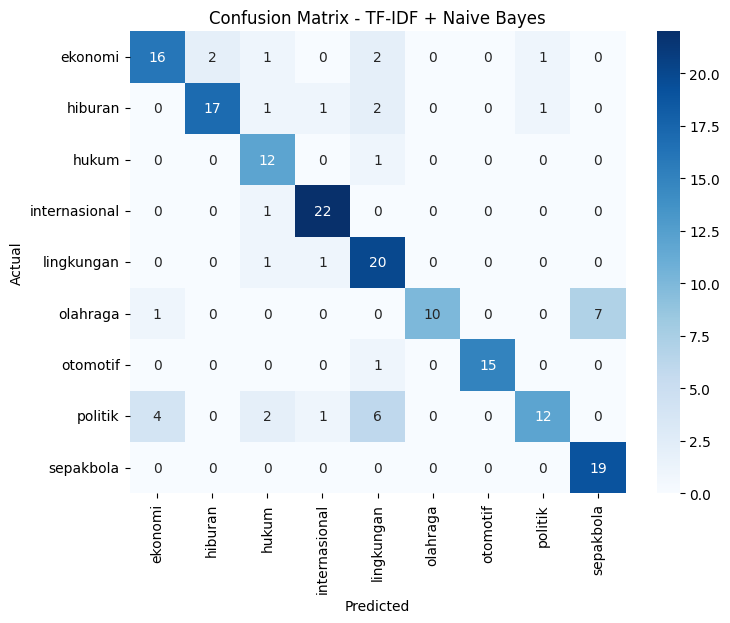

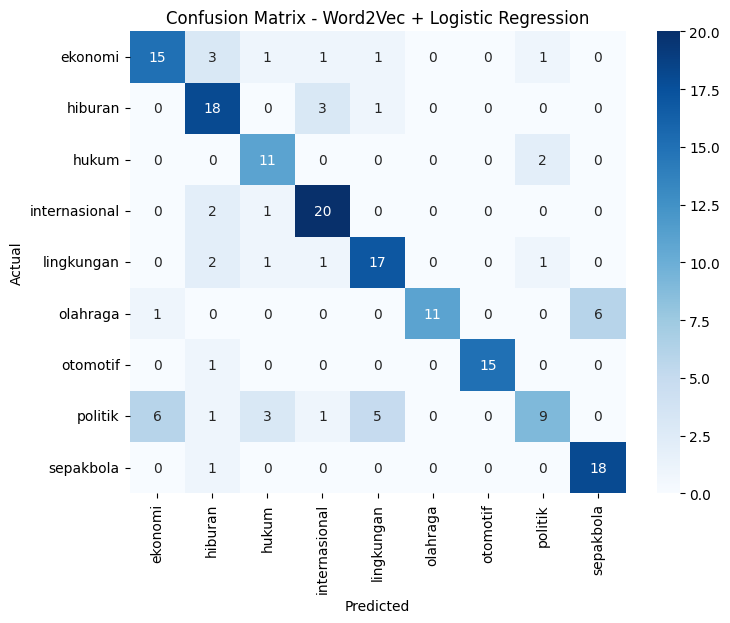

In [12]:
plot_confusion(y_test, y_pred_tfidf, "Confusion Matrix - TF-IDF + Naive Bayes")
plot_confusion(y_test, y_pred_w2v, "Confusion Matrix - Word2Vec + Logistic Regression")
